### European Countries Food Consumption analysis using PCA
Georgia Tech - OMSA  
ISYE-6740 - HW2 - Q2

The data food-consumption.csv contains 16 countries in Europe and their consumption for 20 food items, such as tea, jam, coffee, yogurt, and others. We will perform principal component analysis to explore the
data. The dataset can be found on https://openmv.net/info/food-consumption .
We implement PCA to analyze the data. 

#### *First Part:*  

For this part of the problem we start performing PCA on countries by treating each country’s food consumption as their “feature” vectors, explaining how the data matrix is set-up in this case (e.g., the columns and
the rows of the matrix correspond to what). We extract the first two principal components for each
data point (thus, this means we will represent each data point using a two-dimensional vector). Then draw a
scatter plot of two-dimensional representations of the countries using their two principal components.
In this way we will be able to mark the countries on the plot and explain any pattern observed in the scatter plot.

#### *Dataset Description*
The data provides certain food consumption information for different countries
The following features are included in the data (columns)

1. Country
2. Real coffee
3. Instant coffee
4. Tea
5. Sweetener
6. Biscuits
7. Powder soup
8. Tin soup
9. Potatoes
10. Frozen fish
11. Frozen veggies
12. Apples
13. Oranges
14. Tinned fruit
15. Jam
16. Garlic
17. Butter
18. Margarine
19. Olive oil
20. Yoghurt
21. Crisp bread

We start by loading the data:

In [23]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.sparse.linalg as ll
import pandas

# CSV Data Filename
filename = 'food-consumption.csv'
food_data = pandas.read_csv(filename)

and take sneak view:

In [24]:
# View info
food_data.head(10)

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19,57,51,19,21,27,...,81,75,44,71,22,91,85,74,30,26
1,Italy,82,10,60,2,55,41,3,2,4,...,67,71,9,46,80,66,24,94,5,18
2,France,88,42,63,4,76,53,11,23,11,...,87,84,40,45,88,94,47,36,57,3
3,Holland,96,62,98,32,62,67,43,7,14,...,83,89,61,81,15,31,97,13,53,15
4,Belgium,94,38,48,11,74,37,23,9,13,...,76,76,42,57,29,84,80,83,20,5
5,Luxembourg,97,61,86,28,79,73,12,7,26,...,85,94,83,20,91,94,94,84,31,24
6,England,27,86,99,22,91,55,76,17,20,...,76,68,89,91,11,95,94,57,11,28
7,Portugal,72,26,77,2,22,34,1,5,20,...,22,51,8,16,89,65,78,92,6,9
8,Austria,55,31,61,15,29,33,1,5,15,...,49,42,14,41,51,51,72,28,13,11
9,Switzerland,73,72,85,25,31,69,10,17,19,...,79,70,46,61,64,82,48,61,48,30


For this case we will analyze each country food consumption as their feature vector. In this way every $X[i]$ will be each country and features will be each food consumption item (20 in this case)

In [25]:
# Convert to np array and take the data features (attributes) of interest
Xi = np.array(food_data)[:,1:]
m,n = Xi.shape

# Create COUNTRIES list
Row = list(np.array(food_data)[:,0])
Row

['Germany',
 'Italy',
 'France',
 'Holland',
 'Belgium',
 'Luxembourg',
 'England',
 'Portugal',
 'Austria',
 'Switzerland',
 'Sweden',
 'Denmark',
 'Norway',
 'Finland',
 'Spain',
 'Ireland']

Verify the dimension of the data:

In [26]:
Xi.shape

(16, 20)

We now perform PCA on the data and extract the first two principal components (eigenvalues)

In [27]:
Xi = Xi.astype('float64') # change type to avoid std errors with object type
Xi = Xi.T

# PCA
mu = np.mean(Xi,axis = 1)
xc = Xi - mu[:,None]

C = np.dot(xc,xc.T)/m

K = 2
S,W = ll.eigs(C,k = K)
S = S.real
W = W.real

dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0]) # extract 1st eigenvalues - Whitening applied
dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1]) # extract 2nd eigenvalue - Whitening applied

Now we plot a 2-D representation of those obtained values:

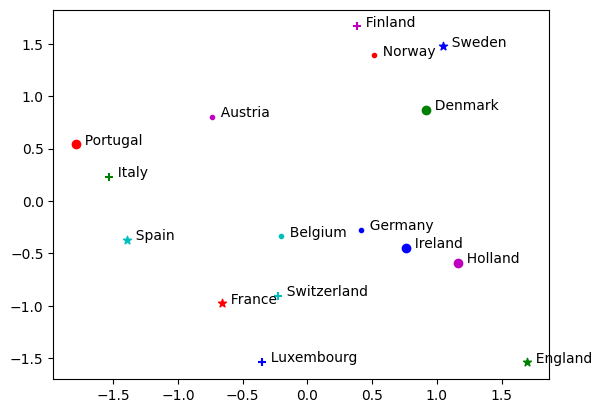

In [28]:
color_string = 'bgrmck'
marker_string = '.+*o'
food_fig = plt.figure()

for i , txt in enumerate(Row):
    #print(i)
    color = color_string[i % 5]
    mark = marker_string[i % 4]
    food_fig.gca().scatter(dim1[i],dim2[i], c = color, marker = mark )
    food_fig.gca().annotate ('  '+txt , (dim1[i],dim2[i]))

plt.show()
food_fig.savefig('food_Part-a.png')

It can be seen from the plot that a clear pattern shows up from the first two eigenvectors. There is a geographic correlation between countries food consumption, as country names are close to each other the same way they are in a map. This probably means that cultural costumes are similat within close distanced countries. This results relates to what our common sense would tell us. This is very clear for example for Denmark, Norway, Sweden and Finland that group thogether. It is interesting to see that England shares no evident group, and that Ireland is not directly related to England but to a different geographical group. The same happens to Italy, but that clustering could be explained from a cultural side point of view (mediterranean diet).

--------------------------------

#### *Second Part:*

Now, we will perform PCA analysis on the data by treating country consumptions as “feature” vectors for each food item. In other words, we will now find weight vectors to combine country consumptions for each food item to perform PCA another way. We will then project data to obtain their two principle components (thus, again each data point – for each food item – can be represented using a two-dimensional vector). Then draw a scatter plot of food items. We will be able to mark the food items on the plot and explain any pattern observed.

In this way every $X[i]$ will be each food type and features will be each country consumption value (16 in this case). This is performed basically by transposing the data as analysed in part (a)

In [29]:
food_data_transp = food_data.T
food_data_transp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Country,Germany,Italy,France,Holland,Belgium,Luxembourg,England,Portugal,Austria,Switzerland,Sweden,Denmark,Norway,Finland,Spain,Ireland
Real coffee,90,82,88,96,94,97,27,72,55,73,97,96,92,98,70,30
Instant coffee,49,10,42,62,38,61,86,26,31,72,13,17,17,12,40,52
Tea,88,60,63,98,48,86,99,77,61,85,93,92,83,84,40,99
Sweetener,19,2,4,32,11,28,22,2,15,25,31,35,13,20,18,11


In [30]:
# Convert to np aray and take the data features (atributes) of interest
Xi = np.array(food_data_transp)[1:,:]
m,n = Xi.shape

# Create FOOD list
Row = list(food_data.columns)[1:]
Row

['Real coffee',
 'Instant coffee',
 'Tea',
 'Sweetener',
 'Biscuits',
 'Powder soup',
 'Tin soup',
 'Potatoes',
 'Frozen fish',
 'Frozen veggies',
 'Apples',
 'Oranges',
 'Tinned fruit',
 'Jam',
 'Garlic',
 'Butter',
 'Margarine',
 'Olive oil',
 'Yoghurt',
 'Crisp bread']

Verify the dimensions of the array:

In [31]:
Xi.shape

(20, 16)

Perform PCA:

In [32]:
Xi = Xi.astype('float64') # change type to avoid std errors with object type
Xi = Xi.T

# PCA
mu = np.mean(Xi,axis = 1)
xc = Xi - mu[:,None]

C = np.dot(xc,xc.T)/m

K = 2
S,W = ll.eigs(C,k = K)
S = S.real
W = W.real

dim1 = np.dot(W[:,0].T,xc)/math.sqrt(S[0]) # extract 1st eigenvalues - Whitening applied
dim2 = np.dot(W[:,1].T,xc)/math.sqrt(S[1]) # extract 2nd eigenvalue - Whitening applied


and plot the results of the two principal components:

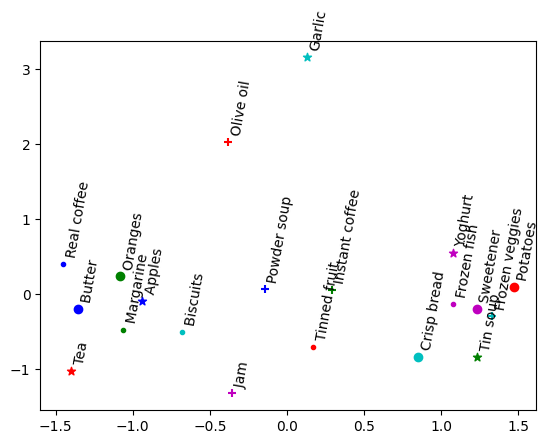

In [33]:
# Plot

color_string = 'bgrmck'
marker_string = '.+*o'
food_fig = plt.figure()

for i , txt in enumerate(Row):
    #print(i)
    color = color_string[i % 5]
    mark = marker_string[i % 4]
    food_fig.gca().scatter(dim1[i],dim2[i], c = color, marker = mark )
    food_fig.gca().annotate ('  '+txt , (dim1[i],dim2[i]), rotation = 80)

plt.show()
food_fig.savefig('food_Part-b.png')

In this case it can be seen that the groups formed for the food consumption around european countries is somewhat not evident at first sight. The only evident grouping or disctintion are the separation of Garlic and Olive oil from the rest. This can be assumed as foods that are part of particular countries diets (for example mediterranean). A curious fact on the grouping is that the cluster where "real coffee" belongs to, can be related to a breakfast meal.